# Sztuczne sieci neuronowe w przetwarzaniu języka naturalnego

<br/>

## dr inż. Aleksander Smywiński-Pohl

## apohllo@agh.edu.pl

## http://apohllo.pl/dydaktyka/nlp

# Plan

* **Sztuczne sieci neuronowe**
* Algorytm wstecznej propagacji błędu
* Sieci rekurencyjne
* Komórka LSTM
* Sieci transformacyjne

# Sztuczne sieci neuronowe (artificial neural networks - ANN)

&nbsp;

<center><img src="img/ann.png" /></center>

&nbsp; <br/>

&nbsp; <br/>

&nbsp;

$$
z = w \cdot x + b
$$

$$
y = a = f(z)
$$

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

$$
tanh(z) = \frac{e^z - e^{-z}}{e^z+e^{-z}}
$$

$$
ReLU(z) = max(x, 0)
$$

# Sigmoida

&nbsp;

<center><img src="img/sigmoid.png" /></center>

# Tangens hiperboliczny

&nbsp;

<center><img src="img/tanh.png" /></center>

# ReLU

&nbsp;

<center><img src="img/relu.png" /></center>

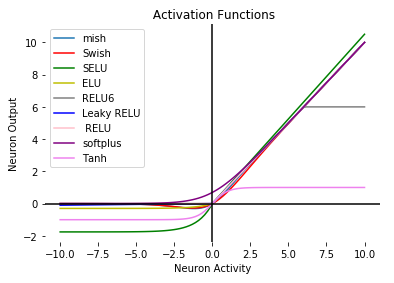

# Sieć w pełni połączona <br/> (feed-forward NN)

&nbsp;

<center><img src="img/fnn.png" /></center>

&nbsp;

$$
h = f(Wx + b)
$$

$$
x \in R^{n_0} 
$$
$$
h \in R^{n_1}
$$
$$
b \in R^{n_1}
$$
$$
W \in R^{n_0 \times n_1} 
$$

$$
z = Uh
$$

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^d e^{z_j}}
$$

# Uogólniona notacja

$$
\begin{split}
a^{[0]} & = x\\
z^{[1]} & = W^{[1]}a^{[0]} + b^{[1]}\\ 
a^{[1]} & = g^{[1]}\left(z^{[1]}\right)\\
\end{split}
$$

$$
\begin{split}
z^{[2]} & = W^{[2]}a^{[1]}+b^{[2]}\\
a^{[2]} & = g^{[2]}\left(z^{[2]}\right)\\
\hat y & = a^{[2]}
\end{split}
$$

$$
\begin{split}
z^{[i]} & = W^{[i]}a^{[i-1]} + b^{[i]}\\
a^{[i]} & = g^{[i]}\left(z^{[i]}\right)
\end{split}
$$

# Funkcja straty (loss function)

$$
L_{CE}(\hat y,y) =  - \sum_{i=1}^{C} y_i log\hat y_i
$$

$$
L_{CE}(\hat y,y) = - log \hat y_i
$$

$$
L_{CE}(\hat y,y) = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$$

# Graf obliczeń

&nbsp;

<center><img src="img/forward.png" /></center>

&nbsp;

$$
\begin{split}
d & = 2 * b\\
e & = a + d\\
L & = c * e
\end{split}
$$

# Plan

* Sztuczne sieci neuronowe
* **Algorytm wstecznej propagacji błędu**
* Sieci rekurencyjne
* Komórka LSTM
* Sieci transformacyjne

# Wsteczna propagacja błędu (error backpropagation, backprop)

$$
f(x) = u(v(x))
$$

$$
\frac{df}{dx} = \frac{du}{dv}\cdot\frac{dv}{dx}
$$

$$
\frac{\partial L}{\partial a}, \frac{\partial L}{\partial b}, \frac{\partial L}{\partial c}
$$

$$
\frac{\partial L}{\partial c} = e
$$

$$
\begin{split}
\frac{\partial L}{\partial a} & = \frac{\partial L}{\partial e}\frac{\partial e}{\partial a}\\
\frac{\partial L}{\partial b} & = \frac{\partial L}{\partial e}\frac{\partial e}{\partial d}\frac{\partial d}{\partial a}
\end{split}
$$

$$
\begin{split}
L = ce & : \frac{\partial L}{\partial c}=e,\frac{\partial L}{\partial e}=c\\
e = a+d & : \frac{\partial e}{\partial a} =1,\frac{\partial e}{\partial d}=1\\
d = 2b & : \frac{\partial d}{\partial b}=2
\end{split}
$$

#  Przejście w tył w grafie obliczeń

&nbsp;

<center><img src="img/backward-pass.png" /></center>

&nbsp;

<center><img src="img/backprop-2.png" /></center>

# Proces uczenia

* stała ucząca/szybkość uczenia się (learning rate)
* inicjalizacja wag
* mini-batch
* epoki
* wczesne zatrzymanie (early stopping)
* dropout
* algorytm optymalizacji
* optymalizacja hiperparametrów
* rola zbioru walidacyjnego
* środowiska do obliczeń: PyTorch, TensorFlow, Jax

# Kluczowy problem - sekwencyjna natura tekstu

* Proste modele, jak *bag-of-words* nie nadają się do klasyfikacji tokenów
* Modele takie jak HMM, MEMM są ograniczone jeśli chodzi o reprezentację kontekstu:
  * kontekst jest niewielki: 2-3 tokeny
  * cechy są określane manualnie
* Zależności w tekście mogą być długodystansowe
  * Gdybym **wiedział** wtedy to co wiem dzisiaj, to bym się nie ...
  * Gdybym **wiedziała** wtedy to co wiem dzisiaj, to bym się nie ...

# Plan

* Sztuczne sieci neuronowe
* Algorytm wstecznej propagacji błędu
* **Sieci rekurencyjne**
* Komórka LSTM
* Sieci transformacyjne

# Sieci rekurencyjne (RNN)

&nbsp;

<center><img src="img/rnn.png" /></center>

Połącznie rekurencyjne wykorzystuje aktywację danej komórki **z poprzedniego kroku czasowego**. 

Dzięki temu - potencjalnie - może wykorzystac informację istotnie odległą w treści od tokenu podlegającego
właśnie analizie. Taka zależność potencjalnie może mieć dowolną długość.

# Inferencja w sieci rekurencyjnej

&nbsp;

<center><img src="img/rnn-unfold.png" /></center>

&nbsp;

$$
h_t = g(U h_{t-1} + W x_t)
$$


$$
y_t = f(V h_t)
$$

Najczęściej *f* to funkcja *softmax*:

$$
\text{softmax}(\mathbf{y})_{i,t} = \frac{e^{y_{i,t}}}{\sum_{j=1}^K e^{y_{j,t}}}
$$

# Algorytm inferencji

&nbsp;

<center><img src="img/rnn-algo.png" /></center>



Wynik obliczania wartości dla pojedynczego kroku to rozkład prawdopodobieństwo przypisania określonego
tagu do aktualnie przetwarzanego tokenu. Warto zwrócić uwagę, że dla 1 tokenu wcześniejszy stan ma wartość 0.

# Wsteczna propagacja błędu w sieci rekurencyjnej (BPTT)

&nbsp;

<center><img src="img/bptt.png" /></center>

BPTT jest dość skomplikowanym procesem. Ponieważ jednak możemy przekształcić obliczenia w formę rozwinięta, stają się one "zwykłym" grafem obliczeniowym, a co za tym idzie obsługiwane są przez narzędzia takie jak PyTorch jak każda inna sieć rekurencyjna.

# Klasyfikacja tokenów przy użyciu RNN

&nbsp;

<center><img src="img/token-classification.png" /></center>

1. Trzeba wskazać, że nie opowiedziałem jak słowa zamieniane są na reprezentacje wektorowe!
1. RNN nie biorą pod uwagę tego co było wcześniej (tzn. predykcji), więc można np. otrzymać po B-ORG I-PERS
1. Często dodaje się warstwę CRF na końcu, żeby rozwiązać ten problem.
1. Innym rozwiązaniem jest użycie algorytmu Viterbiego (np. z jakimś beamem większym niż 1).

# Głębokie sieci rekurencyjne

&nbsp;

<center><img src="img/deep-rnn.png" /></center>

# Sieci dwukierunkowe (BiRNN)

&nbsp;

<center><img src="img/birnn.png" /></center>

&nbsp;

$$
h_t^f = RNN_{forward}(x_1^t)
$$

$$
h_t^b = RNN_{backward}(x_t^n)
$$

$$
h_t = h_t^f \oplus h_t^b
$$

Funkcja łącząca oba wektory nie musi być kontaktenacją, może to być dodawanie, monożenie lub uśrednianie wartości.

# Sieć z długą pamięcią krótkoterminową (LSTM)

* informacja rozbita jest na dwie części:
  * kontekst
  * stan ukryty
* składa się z **bramek**
* struktura bramki:
  * feed-forward
  * funkcja sigmoidalna
  * iloczyn punktowy
* typy bramek:
  * zapominająca
  * dodająca
  * wyjściowa

* Kontekst przekazywany jest do dalszych obliczeń
* Stan ukryty wykorzystywany jest w aktualnym obliczeniu
* Bramka zapominająca czyści kontekst
* Bramka dodająca decyduje co z poprzedniego stanu ukrytego ma trafić do przyszłego kontekstu
* Bramka wyjściwa decyduje co z aktualnego kontekstu ma trafić do aktualnego stanu ukrytego

# Plan

* Sztuczne sieci neuronowe
* Algorytm wstecznej propagacji błędu
* Sieci rekurencyjne
* **Komórka LSTM**
* Sieci transformacyjne

# Struktura komórki LSTM

&nbsp;

<center><img src="img/lstm.png" /></center>

# Bramka zapominająca

* definiowana przez dwie macierze: $U_f$, $W_f$

$$
f_t = \sigma(U_f h_{t-1}+W_f x_t)
$$

Ta wartość określa, które elementy z poprzedniego kontekstu zostaną zapominane (jeśli wartość danego składnika wektora jest bliska 0).

$$
k_t = c_{t-1}\odot f_t
$$

Poprzedni kontekst $c_{t-1}$ jest mnożony przez bramkę zapominającą przez co usuwane są z niego pewne składowe.

# Bramka dodająca

* definiowana przez cztery macierze: $U_g$, $W_g$, $U_i$, $W_i$

$$
g_t = tanh(U_g h_{t-1} + W_g x_t)
$$

Dwie pierwsze macierze służą do transformacji poprzedniego stanu ukrytego oraz aktualnego wyjścia przez funkcję tangansa hiperbolicznego. Jest to "wsad" dla nowego kontekstu.

$$
i_t = \sigma(U_i h_{t-1} + W_i x_t)
$$

Dwie pozostałe macierze służą - analogicznie jak w bramce zapominającej - do określenia, co zostanie przepuszczone dalej z tego "wsadu".

$$
j_t = g_t \odot i_t
$$

Wyjściem bramki dodającej jest druga składowa nowego kontekstu, czyli część informacji z poprzeniego stanu ukrytego oraz aktualnego wejścia.

# Bramka wyjściowa

* definiowana jest przez macierze $U_o$, $W_o$

$$
c_t = k_t + j_t
$$

Jej wejściem jest aktualny kontekst, który wyliczany jest po przejściu obliczeń przez bramkę zapominającą oraz bramkę dodającą.

$$
o_t = \sigma(U_o h_{t-1} + W_o x_t)
$$

Analogicznie jak w innych bramkach, macierze wykorzystywane są do obliczenia maski na podstawie poprzedniego stanu ukrytego oraz aktualnego wejścia.

$$
h_t = o_t \odot tanh(c_t)
$$

Ostatecznie stan ukryty to pewne elementy aktualnego kontekstu, którze przeszły przez bramkę wyjściową.

<center><img src="img/lstm.png" /></center>

# Plan

* Sztuczne sieci neuronowe
* Algorytm wstecznej propagacji błędu
* Sieci rekurencyjne
* Komórka LSTM
* **Sieci transformacyjne**

# Sieć rekurencyjna z atencją

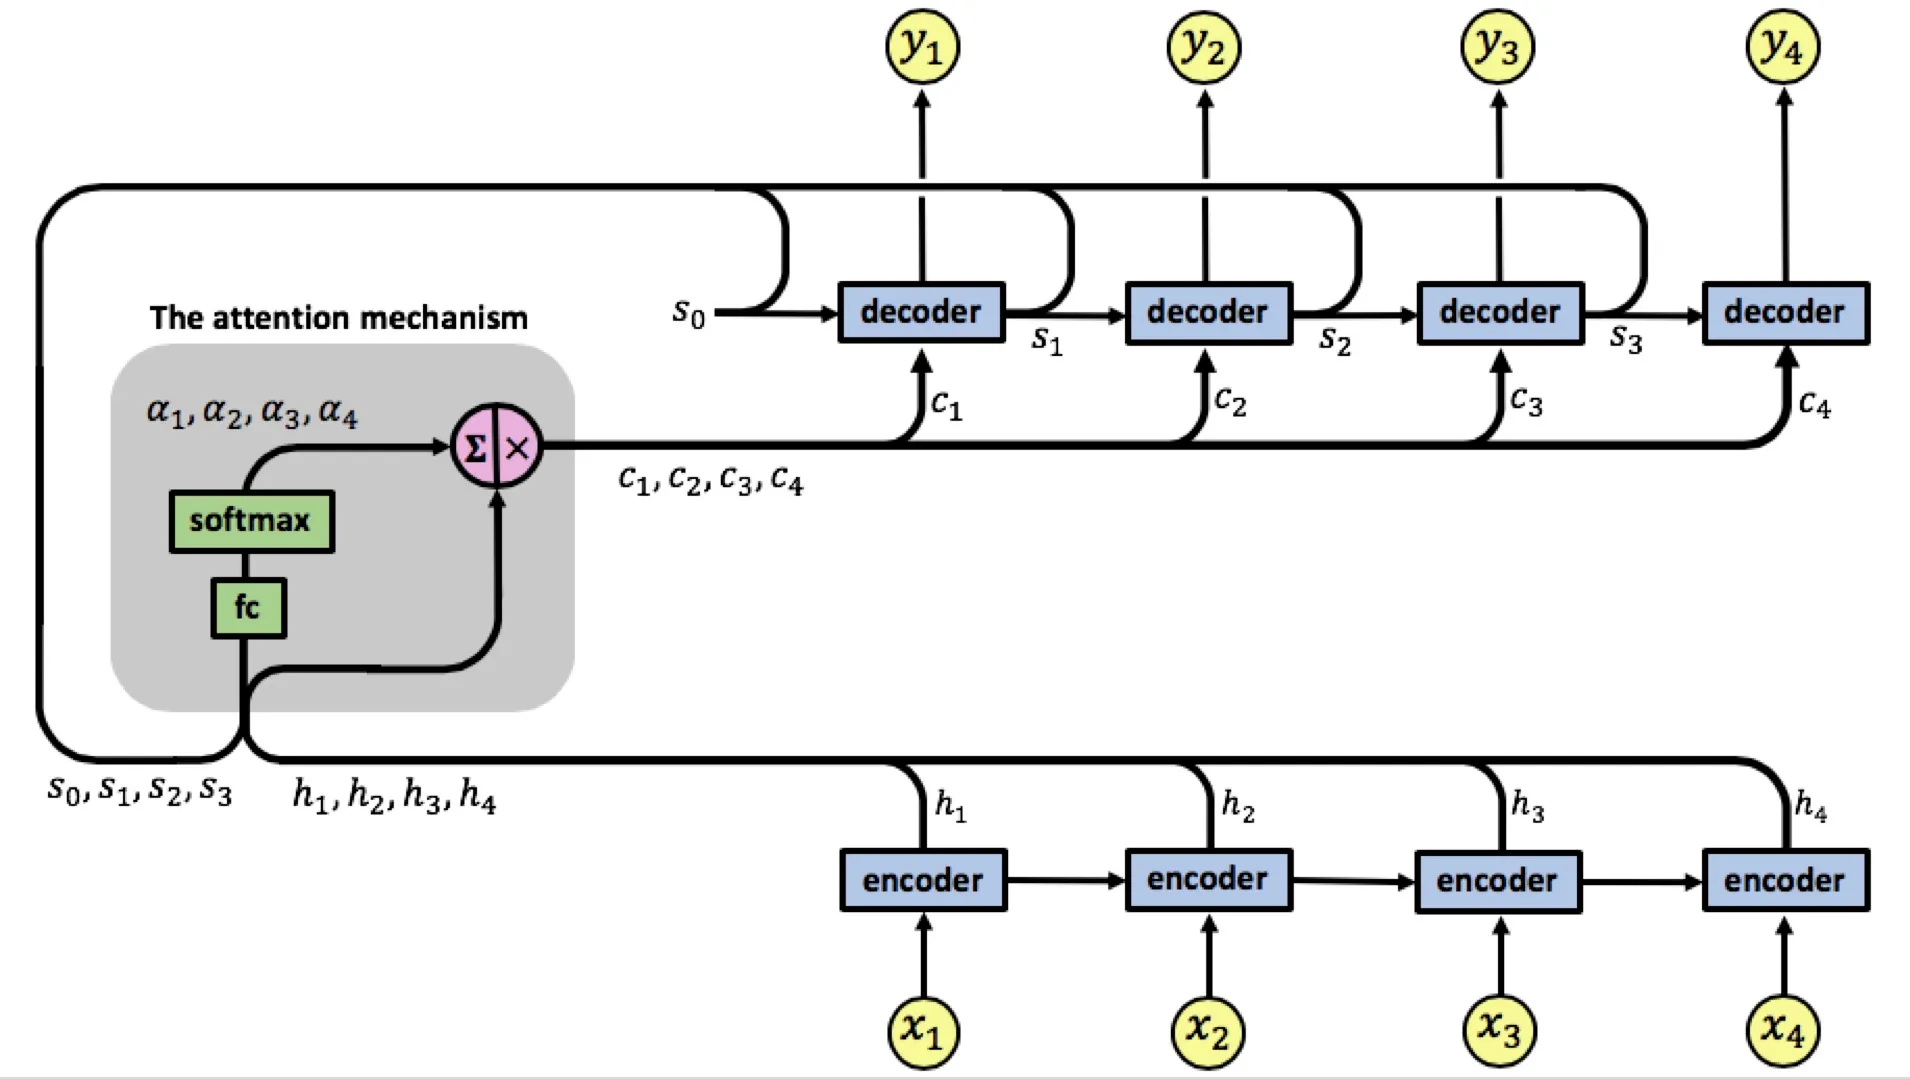

# Architektura transformacyjna, "Attention is all you need" 2017

&nbsp;

<center>
<img src="img/transformer.jpg" width="500px"/>
</center>

## Przeuczenie modelu

<center><img src="img/error.png" /></center>

# Pre-training i fine-tuning 
## Unsupervised sentiment neuron - OpenAI, 2017

<center><img src="img/unsupervised.png" /></center>

## GPT-1 - OpenAI, 2018

<center><img src="img/gpt-1.png"/></center>

# GPT-2 - OpenAI, 2019

&nbsp;
<center>
<img src="img/unicorn1.jpg" width="700px"/>
</center>


## GPT-2 - OpenAI

&nbsp;
<center>
<img src="img/unicorn.png" width="700px"/>
</center>


Źródło: "Language Models are Unsupervised Multitask Learners" A. Radford, J. Wu, R. Child, D. Luan,D. Amodei, I. Sutskever

<center><img src="img/gpt-1-gpu.png" /></center>

## GPT-3

In [2]:
%%html

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">This is mind blowing.<br><br>With GPT-3, I built a layout generator where you just describe any layout you want, and it generates the JSX code for you.<br><br>W H A T <a href="https://t.co/w8JkrZO4lk">pic.twitter.com/w8JkrZO4lk</a></p>&mdash; Sharif Shameem (@sharifshameem) <a href="https://twitter.com/sharifshameem/status/1282676454690451457?ref_src=twsrc%5Etfw">July 13, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# Istota mechanizmu atencji - tłumaczenie maszynowe

<br/>

<center><img src="img/attention-translation.png"/></center>


https://towardsdatascience.com/what-is-attention-mechanism-can-i-have-your-attention-please-3333637f2eac

## Istota mechanizmu samo-atencji

<br/>

<center><img src="img/attention.png"/></center>

* The **animal** didn't cross the street because **it** was too **tired**.
* The animal didn't cross the **street** because **it** was too **crowded**.

https://huggingface.co/exbert/?model=distilbert-base-uncased&modelKind=bidirectional&sentence=The%20animal%20didn%27t%20cross%20the%20street%20because%20it%20was%20too%20crowded.&layer=4&heads=..&threshold=0.7&tokenInd=null&tokenSide=null&maskInds=..&hideClsSep=true

In [1]:
%%html

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">A demo of the attention mechanism of DeepMind&#39;s AlphaCode as it completes a coding question.<br><br>Now consider having 100s of browser tabs open and the attention corresponded to clicking on buttons and keyboard keys. <a href="https://t.co/mU0Cywm9N3">pic.twitter.com/mU0Cywm9N3</a></p>&mdash; dave (@dmvaldman) <a href="https://twitter.com/dmvaldman/status/1602326660220600324?ref_src=twsrc%5Etfw">December 12, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Chcąc określić odpowiedź sieci dla aktualnie analizowanego elementu:
* porównujemy ten element z każdym innym elementem (O($n^2$)), co daje nam wagę (*atencję*) porównywanego elemetu względem elementu analizowanego,
* wynikiem przekształcenia jest suma ważona wszystkich elementów, w kontekście aktualnie analizowanego elementu.

## Macierze atencji

&nbsp;
<center><img src="img/attention-matrices.png" /></center>

* query - reprezentacja subtokenu, która jest wykorzystywana, gdy dany elemnent podlega przetłumaczeniu, 
  w celu wybrania wartości w "tablicy asocjacyjnej" 
* key - reprezentacja subtokenu, jako klucza w tablicy asocjacyjnej, który wskazuje daną wartość
* value - reprezentacja subtokenu, jako wartości w tablicy asocjacyjnej - 
  ta wartość trafia do reprezentacji wynikowej
  
W danej werstawie macierze WQ, WK i WV są wspólne dla wszystkich tokenów (są niezależne od pozycji), ale
mogą uwzględniać pozycję, ponieważ subtoken na wejściu jest sumą osadzenia oraz kodowania pozycyjnego.

## Wynikowa reprezentacja pojedynczego wyrazu

&nbsp;

<center><img src="img/attention-details.png" /></center>

* Na podstawie reprezentacji wejściowej tworzone są reprezentacje subtokenu q,k,v.
* Kiedy tworzomy reprezentację subtokenu 1, bierzemy jego wektor q i mnożymy przez każdy z wektorów kluczy, 
  wszystkich subtokenów. W ten sposób, dla każdej pary subtokenów otrzymujemy wartość.
* Dla tego zbirou wartości wywołujemy funkcję softmax i dzilimy wynik przez 8 (pierwiastek z rozmiaru wektorów q,k,v).
* Otrzymuje infomrację, jaki udział będzie miał dany subtoken w wynikowej reprezentacji - trafiają do niej
  wektory v pomnożone przez wartość tej funkcji.

## Słownik Pythona

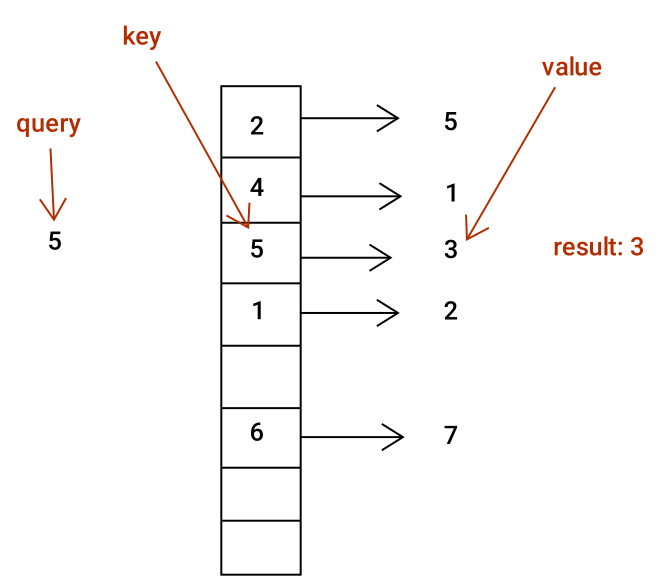

## Atencja jako miękki słownik

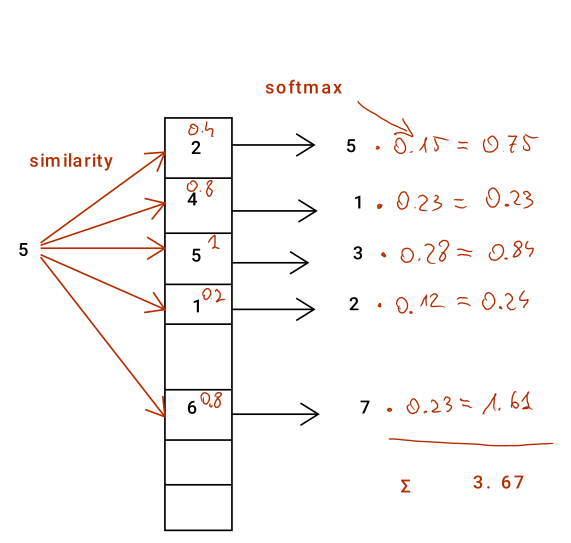

# Algorytm obliczania atencji

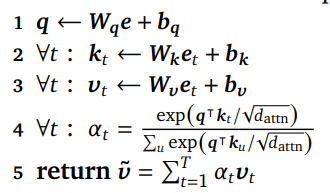

## Wzór na atencję

<br/>

<center><img src="img/attention-eqn.png"/></center>

Wzór na atencje zawiera odwołanie do macierzy, ponieważ obliczenie wykonywane jest jednocześnie dla wielu
subtokenów (tzn. na wejściu mamy wiele wektorów q, które łączymy w macierz Q, itd.)

# Architektura transformacyjna

&nbsp;

<center>
<img src="img/transformer.jpg" width="500px"/>
</center>

Implementacja wraz z wyjaśnieniem: https://threadreaderapp.com/thread/1470406419786698761.html

## Architektura BERTa - Google

<img src="img/bert-architecture.png"/>

Źródło: http://jalammar.github.io/illustrated-bert/

## N-gramowy model języka

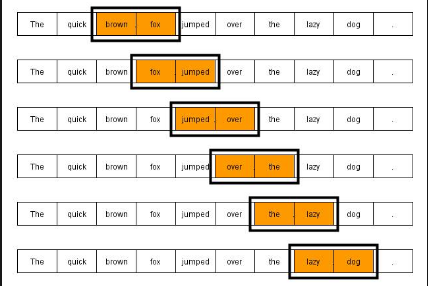

# Rodzaje modeli językowych

* model kauzalny - przewidywanie **kolejnego wyrazu** (vide GPT)
* model maskowany - przewidywanie **brakujących wyrazów** (vide BERT)
* model rekonstrukcyjny - odtwarzanie **usuniętych fragmentów tekstu** (vide T5)

## Kauzalne modelowanie języka

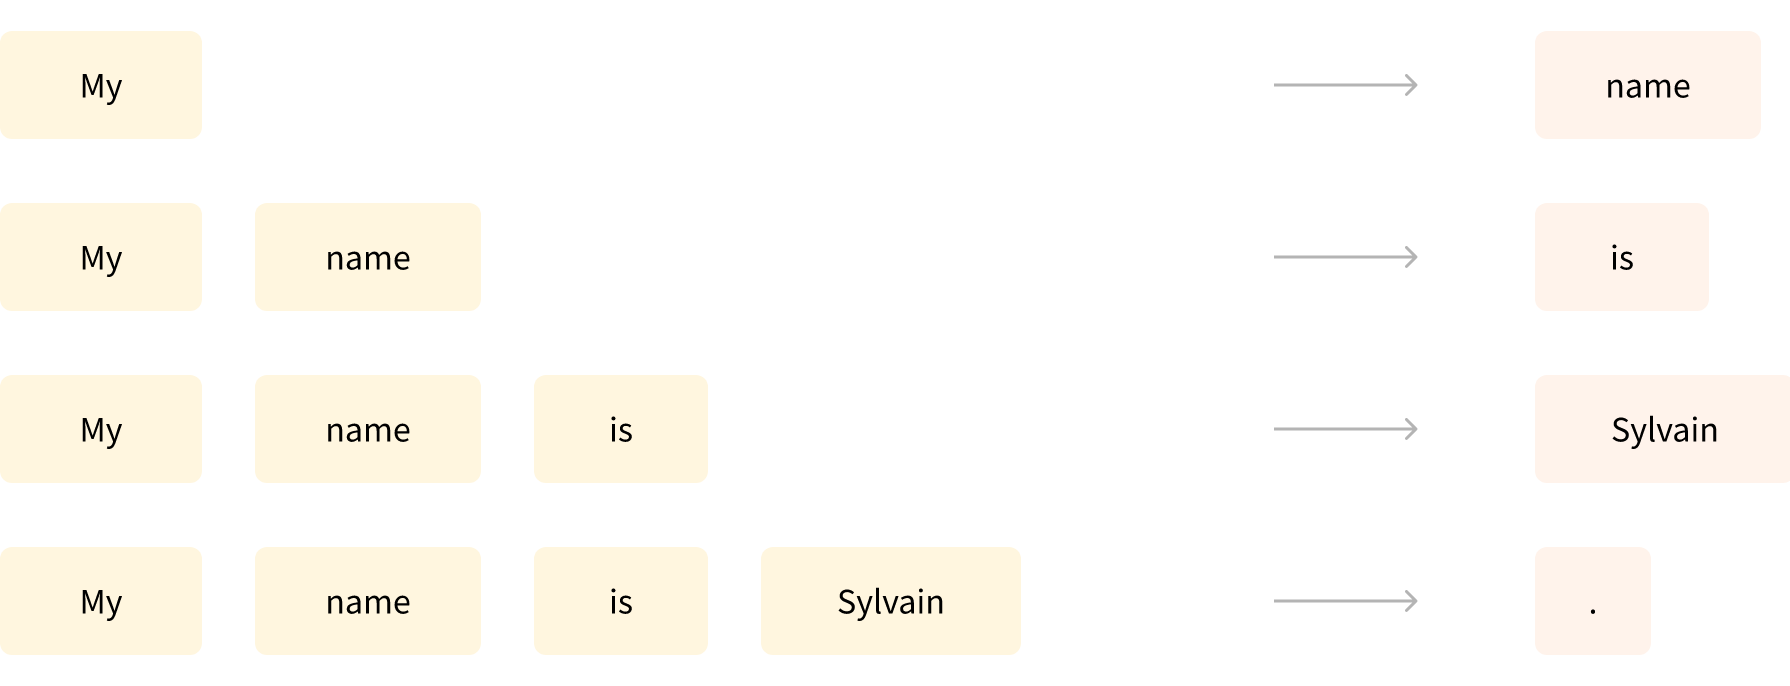

# Maskowany model języka (MLM)

<br/>

<center><img src="img/mlm.png" /></center>

## Model rekonstrukcyjny

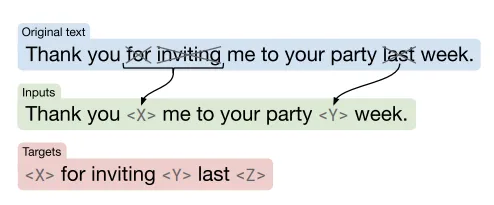

# Warianty sieci transformacyjnych

* architekturalne
  * BERT
  * Albert
  * XLNet
  * BART
  * GPT
  * T5
  * ...

* pretrenowane
  * RoBERTa, XLMR
  * FlauBERT
  * FinBERT
  * PolBERT
  * HerBERT
  * ...

## "Prawo" skalowania modeli

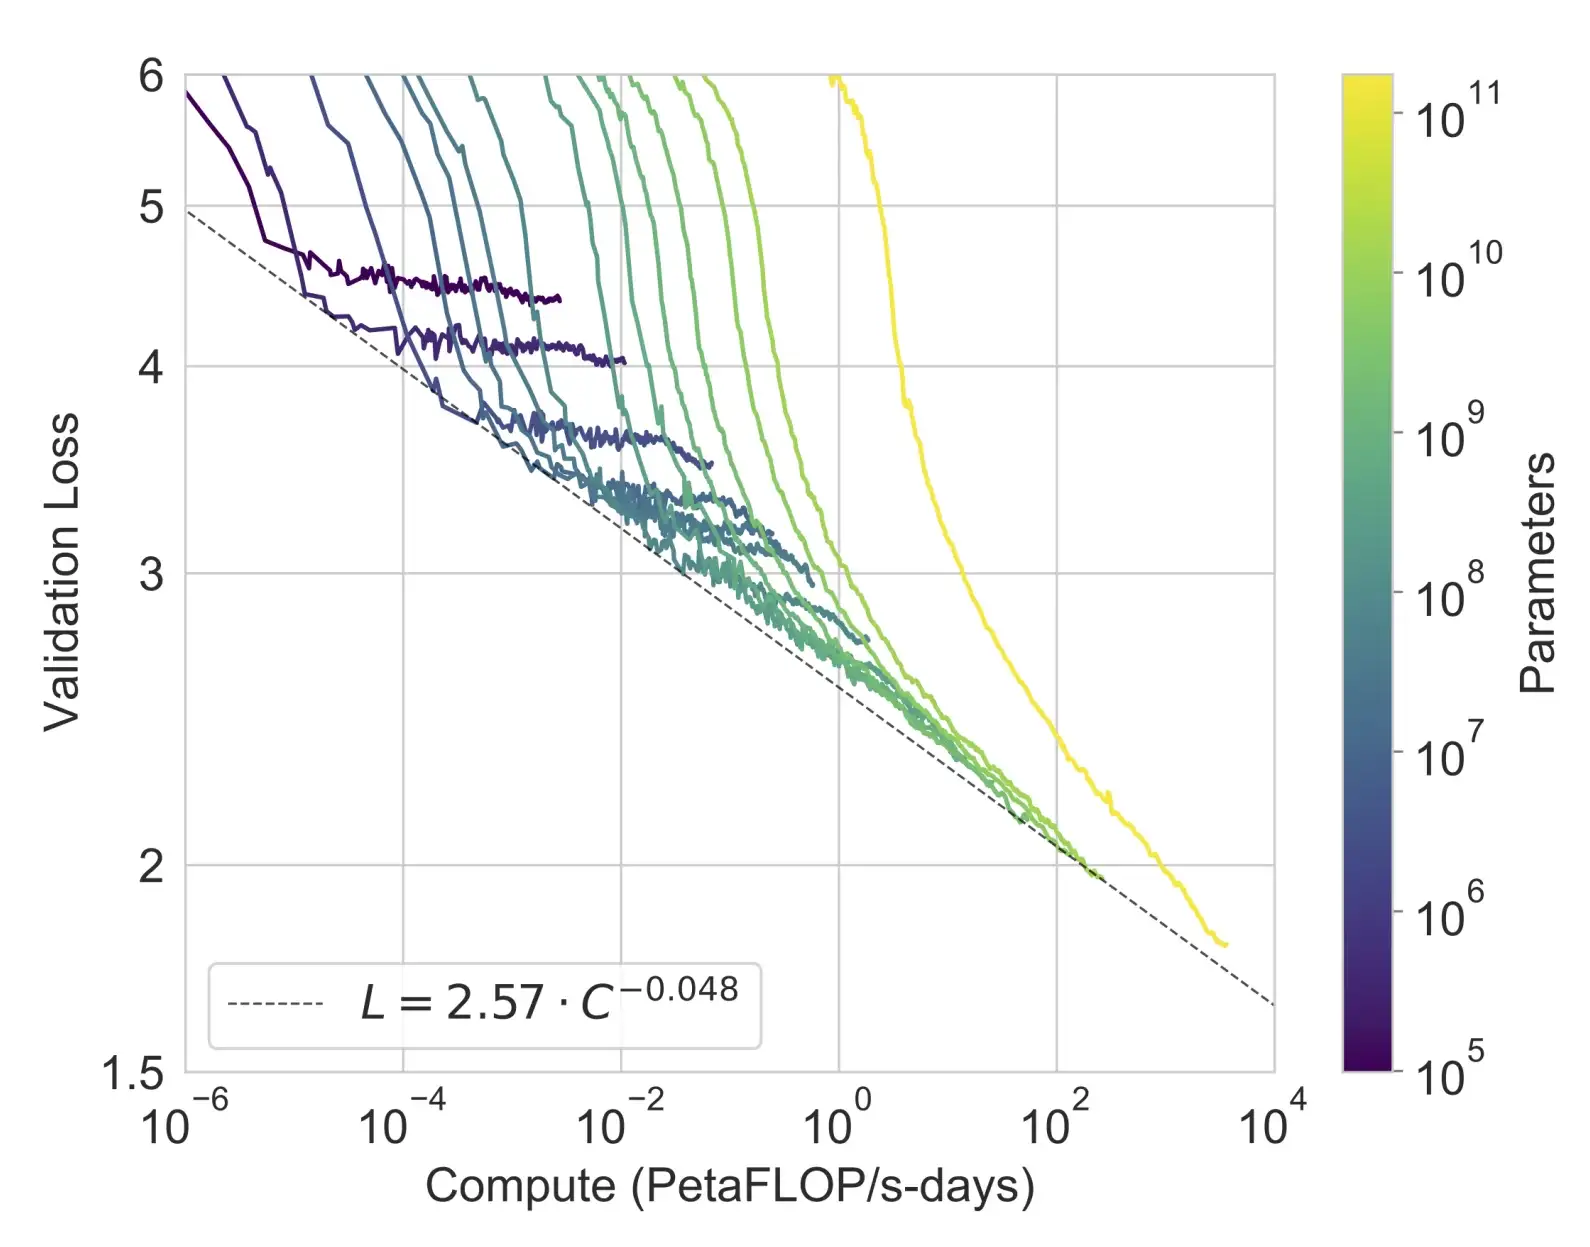

# Literatura

* [9 rozdział SLP](https://web.stanford.edu/~jurafsky/slp3/9.pdf)
* [Recurrent Neural Networks and LSTM explained](https://medium.com/@purnasaigudikandula/recurrent-neural-networks-and-lstm-explained-7f51c7f6bbb9)

<center>
<img src="img/bert-mascote.png"/>
</center>